In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import sklearn
import json
import matplotlib.pyplot as plt
import seaborn as sns

#np.set_printoptions(suppress=True)

In [2]:
# upload data
data = pd.read_csv('data/digit.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, pixel 1,1 to label
dtypes: float64(784), int64(1)
memory usage: 59.9 MB


In [4]:
data.describe()

,"pixel 1,1","pixel 1,2","pixel 1,3","pixel 1,4","pixel 1,5","pixel 1,6","pixel 1,7","pixel 1,8","pixel 1,9","pixel 1,10",...,"pixel 28,20","pixel 28,21","pixel 28,22","pixel 28,23","pixel 28,24","pixel 28,25","pixel 28,26","pixel 28,27","pixel 28,28",label
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000480,0.000239,0.000050,0.000025,0.0,0.0,0.0,0.0,0.0,4.453400
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.017804,0.013588,0.003535,0.002500,0.0,0.0,0.0,0.0,0.0,2.884451
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,4.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,7.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.988281,0.988281,0.250000,0.250000,0.0,0.0,0.0,0.0,0.0,9.000000


## 원핫인코딩

In [78]:
x = data.drop('label', axis=1)
y = data['label']

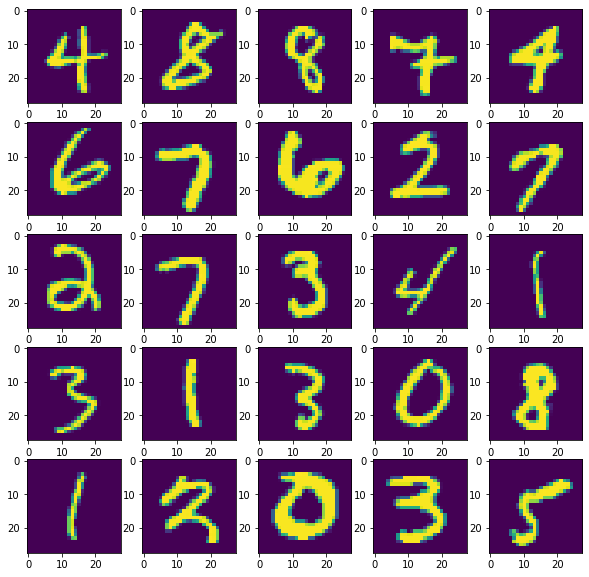

In [79]:
# DataFrame index로 보려면 iloc 써줘야한다

x.iloc[0], y[0]
fig, axes = plt.subplots(5, 5, figsize=(10,10))
for i in range(25):
    img = np.reshape(x.iloc[i].values, (28, 28))
    axes[i//5, i%5].imshow(img)
#plt.tight_layout()
plt.show()


In [89]:
x = np.array(x)
x = x.reshape(10000, 28, 28, 1)
y = pd.get_dummies(y)
x[:5], y[:5]

(array([[[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         ...,
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]],
 
 
        [[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
      

## 테스트 데이터 나누기

In [90]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2022)

In [91]:
x_train.shape, y_train.shape

((8000, 28, 28, 1), (8000, 10))

## 모델 학습시키기

In [130]:
# create model
# multi-class classification
 
keras.backend.clear_session()

# model = keras.models.Sequential()
# model.add(keras.layers.Input(shape=(28*28)))
# model.add(keras.layers.Dense(10, activation='softmax'))

# CNN 으로 하면 image feature를 학습하기때문에 dense와 다른 정확도
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.Conv2D(64, kernel_size=(2, 2), strides=(1, 1), padding='same', activation='relu'))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation='softmax'))

In [131]:
# 다중분류이므로 손실함수는 categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [132]:
model.fit(x_train, y_train, epochs=10,)

Epoch 1/10
250/250 [==============================] - 9s 35ms/step - loss: 0.6266 - accuracy: 0.8070
Epoch 2/10
250/250 [==============================] - 9s 36ms/step - loss: 0.0998 - accuracy: 0.9713
Epoch 3/10
250/250 [==============================] - 9s 36ms/step - loss: 0.0648 - accuracy: 0.9785
Epoch 4/10
250/250 [==============================] - 9s 37ms/step - loss: 0.0329 - accuracy: 0.9905
Epoch 5/10
250/250 [==============================] - 9s 36ms/step - loss: 0.0212 - accuracy: 0.9935
Epoch 6/10
250/250 [==============================] - 9s 37ms/step - loss: 0.0172 - accuracy: 0.9945
Epoch 7/10
250/250 [==============================] - 9s 36ms/step - loss: 0.0131 - accuracy: 0.9953
Epoch 8/10
250/250 [==============================] - 9s 36ms/step - loss: 0.0184 - accuracy: 0.9934
Epoch 9/10
250/250 [==============================] - 9s 36ms/step - loss: 0.0073 - accuracy: 0.9984
Epoch 10/10
250/250 [==============================] - 9s 36ms/step - loss: 0.0051 - accura

In [133]:
y_pred = model.predict(x_test)
y_pred
np.argmax(y_pred[:5], axis=1)

array([7, 8, 9, 1, 3], dtype=int64)

In [134]:
y_test[:5]

,0,1,2,3,4,5,6,7,8,9
6487,0,0,0,0,0,0,0,1,0,0
8785,0,0,0,0,0,0,0,0,1,0
7390,0,0,0,0,0,0,0,0,0,1
7078,0,1,0,0,0,0,0,0,0,0
1230,0,0,0,1,0,0,0,0,0,0


In [135]:
model.evaluate(x_test, y_test)

63/63 [==============================] - 1s 7ms/step - loss: 0.1340 - accuracy: 0.9785


[0.13404373824596405, 0.9785000085830688]

## 내가 쓴 숫자 맞추기

In [136]:
import cv2 as cv

In [137]:
def getImage(path):
    image = cv.imread(path, cv.IMREAD_GRAYSCALE)
    image = cv.resize(image, (28, 28))
    image = image.astype('float32')
    image = 255-image
    image /= 255

    return image

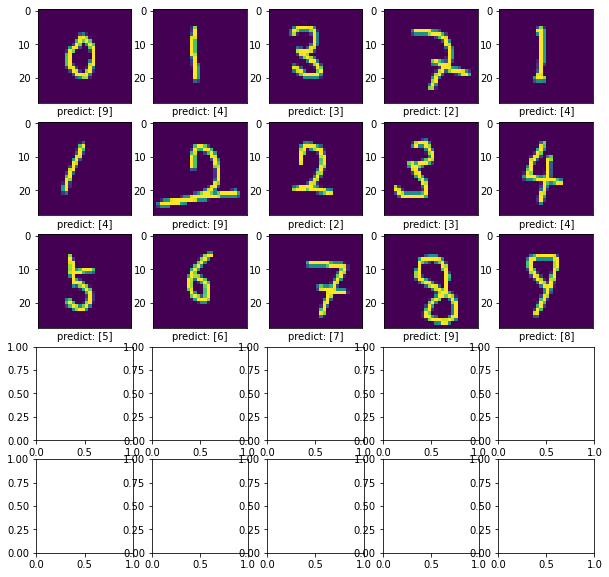

In [165]:

import os
files = [file for file in os.listdir('data') if file.split('.')[1]=='png']
fig, axes = plt.subplots(5, 5, figsize=(10,10))
for i in range(len(files)):
    path = os.path.join(os.getcwd(),'data', files[i])
    img = getImage(path)
    axes[i//5, i%5].imshow(img)
    axes[i//5,i%5].set_xlabel(f'predict: {model.predict(img.reshape(1, 28, 28, 1)).argmax(axis=1)}')
    axes[i//5,i%5].set_xticks([])
    
#plt.tight_layout()
plt.show()
